# Eksploracja Danych - Projekt
Tomasz Kiljańczyk (136257)

Wojciech Lulek (136280)

# Załadowanie bibliotek i danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_dir = './data'

In [2]:
us_trending_df = pd.read_csv(os.path.join(data_dir, 'US_youtube_trending_data.csv'))
us_trending_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116786,-nAwTgr9Ylk,“An Era Is Over” - Rich Eisen's Live Reaction ...,2022-03-08T19:26:55Z,UCqMtxjKnR7ySbEZSs2N-v0Q,The Rich Eisen Show,17,2022-03-14T00:00:00Z,Rich Eisen|Rich Eisen Show|sports|NFL|football...,317417,4967,0,1097,https://i.ytimg.com/vi/-nAwTgr9Ylk/default.jpg,False,False,Rich Eisen reacts to the breaking news that th...
116787,q_YZX1SgZ5Y,Adam Savage Takes the Aluminum Foil Ball Chall...,2022-03-07T15:00:27Z,UCiDJtJKMICpb9B1qf7qjEOA,Adam Savage’s Tested,28,2022-03-14T00:00:00Z,tested|foil ball|aluminum foil ball|polishing ...,2158717,56588,0,10487,https://i.ytimg.com/vi/q_YZX1SgZ5Y/default.jpg,False,False,Subscribe for more videos (and click the bell ...
116788,K4XTSem2_Pc,Kevin Owens Calls Out Stone Cold Steve Austin ...,2022-03-08T04:08:43Z,UCSy3TvvwAV12MD0rLsHyClQ,WWE on USA,17,2022-03-14T00:00:00Z,WWE|WWE Raw|WWE Raw Highlights|WWE Raw Highlig...,581932,9910,0,1661,https://i.ytimg.com/vi/K4XTSem2_Pc/default.jpg,False,False,"Kevin Owens has a plan to get to Wrestlemania,..."
116789,p3KZXi9JDKE,the dropper in 2022,2022-03-06T16:00:33Z,UCiZ2z8F8ilr6SC7lOaxAQ4g,camman18,24,2022-03-14T00:00:00Z,camman18|camman18 minecraft|minecraft|minecraf...,8851737,875413,0,7474,https://i.ytimg.com/vi/p3KZXi9JDKE/default.jpg,False,False,follow my twitter: https://twitter.com/camman1...


# Analiza danych

## Analiza wstępna

In [3]:
us_trending_df.shape

(116791, 16)

In [4]:
us_trending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116791 entries, 0 to 116790
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           116791 non-null  object
 1   title              116791 non-null  object
 2   publishedAt        116791 non-null  object
 3   channelId          116791 non-null  object
 4   channelTitle       116791 non-null  object
 5   categoryId         116791 non-null  int64 
 6   trending_date      116791 non-null  object
 7   tags               116791 non-null  object
 8   view_count         116791 non-null  int64 
 9   likes              116791 non-null  int64 
 10  dislikes           116791 non-null  int64 
 11  comment_count      116791 non-null  int64 
 12  thumbnail_link     116791 non-null  object
 13  comments_disabled  116791 non-null  bool  
 14  ratings_disabled   116791 non-null  bool  
 15  description        113699 non-null  object
dtypes: bool(2), int64(5)

Kolumny opisujące daty są typu object.
Można je zrzutować na typ datetime64.
categoryId należy zrzutować na typ string, ponieważ nie chcemy go traktować jako dane numeryczne.

In [5]:
us_trending_df = us_trending_df.astype({
    'trending_date': np.datetime64,
    'publishedAt': np.datetime64,
    'categoryId': str
})
us_trending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116791 entries, 0 to 116790
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   video_id           116791 non-null  object        
 1   title              116791 non-null  object        
 2   publishedAt        116791 non-null  datetime64[ns]
 3   channelId          116791 non-null  object        
 4   channelTitle       116791 non-null  object        
 5   categoryId         116791 non-null  object        
 6   trending_date      116791 non-null  datetime64[ns]
 7   tags               116791 non-null  object        
 8   view_count         116791 non-null  int64         
 9   likes              116791 non-null  int64         
 10  dislikes           116791 non-null  int64         
 11  comment_count      116791 non-null  int64         
 12  thumbnail_link     116791 non-null  object        
 13  comments_disabled  116791 non-null  bool    

W kolumnie description występują brakujące wartości.
Można by je uzupełnić pustym stringiem albo spacją.

In [6]:
us_trending_df['description'].replace(np.NaN, '', inplace=True)
us_trending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116791 entries, 0 to 116790
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   video_id           116791 non-null  object        
 1   title              116791 non-null  object        
 2   publishedAt        116791 non-null  datetime64[ns]
 3   channelId          116791 non-null  object        
 4   channelTitle       116791 non-null  object        
 5   categoryId         116791 non-null  object        
 6   trending_date      116791 non-null  datetime64[ns]
 7   tags               116791 non-null  object        
 8   view_count         116791 non-null  int64         
 9   likes              116791 non-null  int64         
 10  dislikes           116791 non-null  int64         
 11  comment_count      116791 non-null  int64         
 12  thumbnail_link     116791 non-null  object        
 13  comments_disabled  116791 non-null  bool    

Przy ręcznej analizie znaleziono też tagi `[None]`.
Chyba najlepiej zamienić je na pusty string.

In [7]:
us_trending_df['tags'].replace('[None]', '', inplace=True)

In [8]:
us_trending_df.nunique()

video_id              21071
title                 21526
publishedAt           20753
channelId              5293
channelTitle           5378
categoryId               15
trending_date           564
tags                  15488
view_count           114318
likes                 85665
dislikes              13179
comment_count         27306
thumbnail_link        21071
comments_disabled         2
ratings_disabled          2
description           21522
dtype: int64

W policzonych unikatowych wartościach widać, że unikatowych wartości video_id jest mniej niż ilość wszystkich rzędów w pliku.

Wynika to z faktu, że w danych znajdują się zrzuty listy trending z wielu dni.
Jeden filmik mógł być trending przez parę dni.

## Wizualizacje

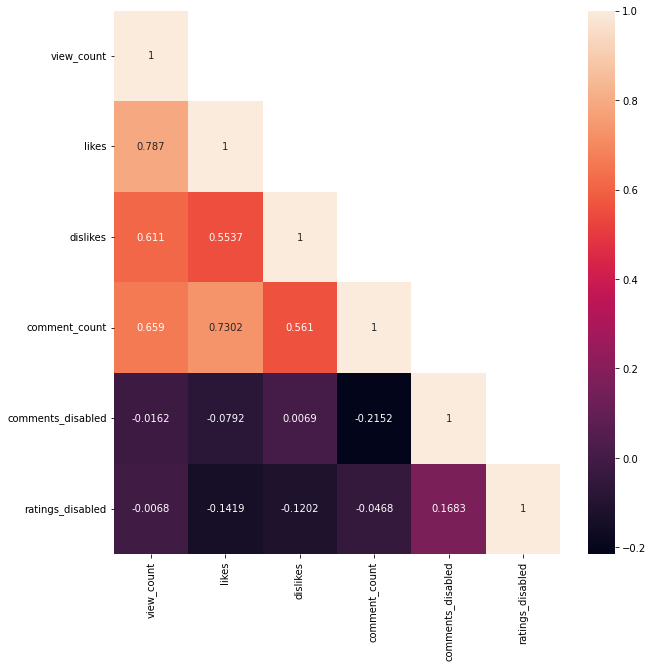

In [9]:
corrMatrix = us_trending_df.corr(method='spearman')
corrMatrix = corrMatrix.round(4)

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
np.fill_diagonal(mask, False)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrMatrix, mask=mask, annot=True, fmt='g', ax=ax)
plt.show()

Używamy metryki Spearmana, ponieważ to umożliwia odkrycie nieliniowych zależności między cechami.

Zależności większe niż |0.5|:
* view_count:
    * comment_count
    * dislikes
    * likes
* likes:
    * comment_count
    * dislikes
* dislikes:
    * comment_count

Z wypisanych zależności wynika, że im więcej osób ogląda filmik, tym więcej jest komentarzy, polubień i antypolubień.
To jest logiczna konsekwencja wpływu oglądalności na te cechy.

<AxesSubplot:>

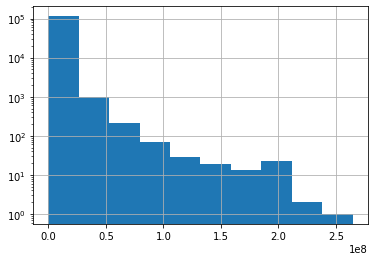

In [10]:
us_trending_df['view_count'].hist(log=True)

<AxesSubplot:>

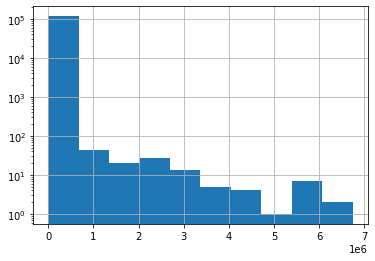

In [11]:
us_trending_df['comment_count'].hist(log=True)

<AxesSubplot:>

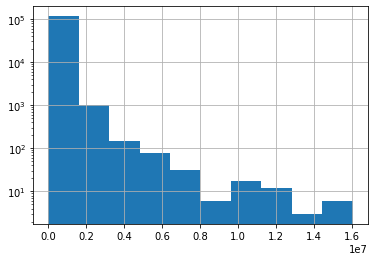

In [12]:
us_trending_df['likes'].hist(log=True)

<AxesSubplot:>

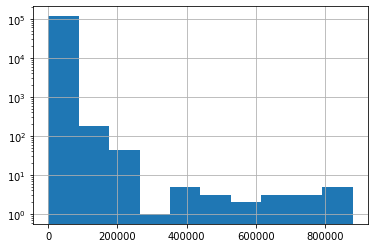

In [13]:
us_trending_df['dislikes'].hist(log=True)

## Analiza kategorii

In [14]:
import json

with open(os.path.join(data_dir,'US_category_id.json'), mode='r') as file:
    us_category_id_dict = json.loads(file.read())

us_categories = {}
for category in us_category_id_dict['items']:
    us_categories[category['id']] = category['snippet']['title']

us_categories

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [15]:
len(us_categories)

32

Z analizy wynika, że używane jest 15 kategorii, a w pliku JSON dostarczone zostało 32 kategorie.
17 kategorii jest nieużywanych.

In [16]:
us_trending_df['category'] = us_trending_df['categoryId']
us_trending_df['category'] = us_trending_df['category'].apply(us_categories.get).replace(np.NaN, '')
us_trending_df['category']

0               People & Blogs
1                       Gaming
2                Entertainment
3                        Music
4                Howto & Style
                  ...         
116786                  Sports
116787    Science & Technology
116788                  Sports
116789           Entertainment
116790                  Gaming
Name: category, Length: 116791, dtype: object

In [17]:
category_counts = us_trending_df.groupby(["category"]).size().reset_index(name='counts')
category_counts

,category,counts
0,Autos & Vehicles,2099
1,Comedy,6704
2,Education,2794
3,Entertainment,23518
4,Film & Animation,4579
5,Gaming,21015
6,Howto & Style,3650
7,Music,19903
8,News & Politics,4454
9,Nonprofits & Activism,88


<AxesSubplot:xlabel='category'>

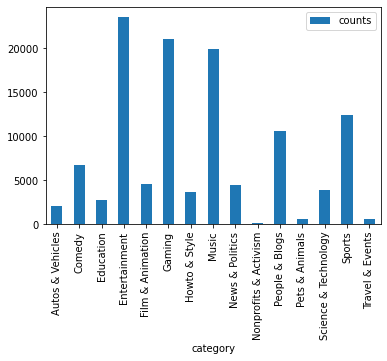

In [18]:
category_counts.plot(x='category', y='counts', kind='bar')

## Analiza tytułów

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(strip_accents='unicode', stop_words='english')

In [20]:
titles_vectorized_csr = vectorizer.fit_transform(us_trending_df['title'])
token_count_sum = titles_vectorized_csr.sum(axis=0).A1
tokens = vectorizer.get_feature_names_out()
df_dict = {'token': tokens, 'count': token_count_sum}
token_count_df = pd.DataFrame(df_dict)
token_count_df

,token,count
0,00,22
1,000,2009
2,0000001,5
3,000cal,6
4,000fps,24
...,...,...
18241,辣椒,8
18242,过的是生活,9
18243,还有花生丨liziqi,6
18244,進撃の巨人,5


In [21]:
top_words = token_count_df.sort_values(by=['count'], ascending=False).head(100).reset_index(drop=True)
print(top_words.to_string())

         token  count
0     official  14802
1        video  13096
2           vs   6315
3    minecraft   5350
4        music   4803
5      trailer   4669
6         2021   4660
7   highlights   4504
8       shorts   4212
9          new   3917
10        game   3251
11          ft   3174
12        2020   2767
13      season   2177
14         lil   2100
15       world   2031
16         000   2009
17        feat   1971
18        live   1826
19         day   1820
20        life   1710
21    fortnite   1641
22          10   1547
23     episode   1545
24         nba   1507
25        best   1499
26         100   1490
27       audio   1490
28        baby   1487
29   challenge   1370
30     oficial   1364
31       house   1312
32        home   1249
33       night   1240
34         got   1220
35      teaser   1205
36      sports   1159
37        time   1158
38         man   1140
39       dream   1107
40      reacts   1100
41      update   1082
42         nfl   1052
43      reveal   1044
44        

Notatka:
* Można wpisać słowa jako cechy i potem usuwać metodami z wykłladu
* Przydałby się ranking informatywności.
* Można użyć słownika z kategoriami

## Analiza tagów

In [22]:
vectorizer = CountVectorizer(strip_accents='unicode', token_pattern=r'[^|]+')

In [23]:
tags_vectorized_csr = vectorizer.fit_transform(us_trending_df['tags'])
token_count_sum = tags_vectorized_csr.sum(axis=0).A1
tokens = vectorizer.get_feature_names_out()
df_dict = {'token': tokens, 'count': token_count_sum}
token_count_df = pd.DataFrame(df_dict)
token_count_df

,token,count
0,#shorts,31
1,#shorts,2
2,1st odi,7
3,5 guys vs 5 girls,20
4,a colors show,15
...,...,...
120479,鶴巻和也,5
120480,😂,9
120481,🥀❌,1
120482,🥀❌🥀,4


In [24]:
top_tags = token_count_df.sort_values(by=['count'], ascending=False).head(100).reset_index(drop=True)
print(top_tags.to_string())

                     token  count
0                    funny   8173
1                minecraft   5697
2                   comedy   5288
3                challenge   3381
4                      rap   3374
5                     vlog   2942
6                     news   2926
7                 football   2894
8                    music   2778
9                  hip hop   2720
10              highlights   2655
11                  tiktok   2403
12                  gaming   2376
13               animation   2350
14                fortnite   2201
15                     nba   2184
16                  family   2134
17                  sports   2092
18         family friendly   1917
19                     new   1890
20                  how to   1823
21                reaction   1741
22                   video   1730
23                 trailer   1667
24                    game   1663
25              basketball   1629
26                  soccer   1516
27                     diy   1499
28     minecra

# Inne atrybuty

## Nowe atrybuty na podstawie atrybutów tekstowych

<AxesSubplot:>

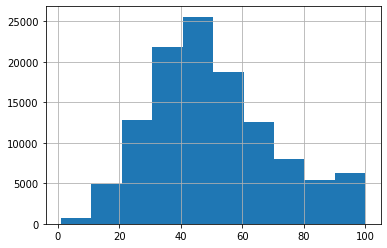

In [25]:
us_trending_df['title_length'] = us_trending_df['title'].str.len()
us_trending_df['title_length'].hist()

<AxesSubplot:>

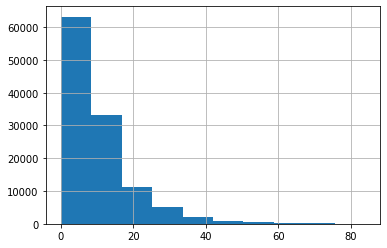

In [26]:
us_trending_df['title_capital_letters'] = us_trending_df['title'].str.count(r'[A-Z]')
us_trending_df['title_capital_letters'].hist()

<AxesSubplot:>

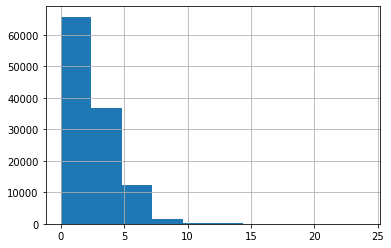

In [27]:
us_trending_df['title_punctuaction'] = us_trending_df['title'].str.count(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]')
us_trending_df['title_punctuaction'].hist()

<AxesSubplot:>

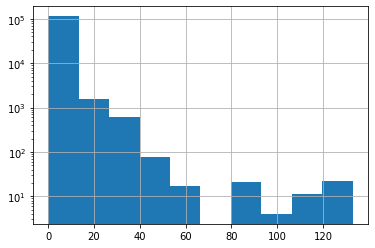

In [28]:
us_trending_df['description_height'] = us_trending_df['description'].str.count(r'[\r\n]')
us_trending_df['description_height'].hist(log=True)

<AxesSubplot:>

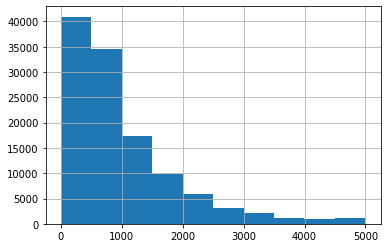

In [29]:
us_trending_df['description_length'] = us_trending_df['description'].str.len()
us_trending_df['description_length'].hist()

<AxesSubplot:>

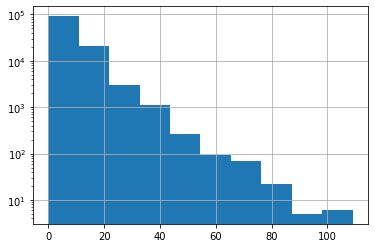

In [30]:
us_trending_df['description_link_count'] = us_trending_df['description'].str.count(r'://')
us_trending_df['description_link_count'].hist(log=True)

Notatka: można podzielić linki na kategorie

<AxesSubplot:>

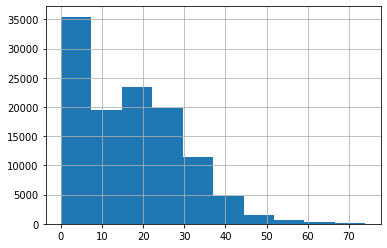

In [31]:
us_trending_df['tag_amount'] = us_trending_df['tags'].apply(lambda tags: 0 if tags == '' else tags.count('|') + 1)
us_trending_df['tag_amount'].hist()

## Nowe atrybuty na podstawie dat

<AxesSubplot:>

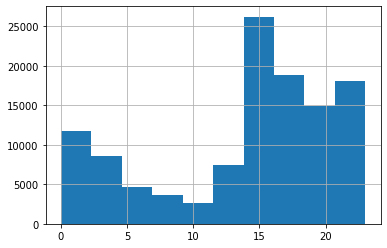

In [32]:
us_trending_df['publishedAtHour'] = us_trending_df['publishedAt'].dt.hour
us_trending_df['publishedAtHour'].hist()

<AxesSubplot:>

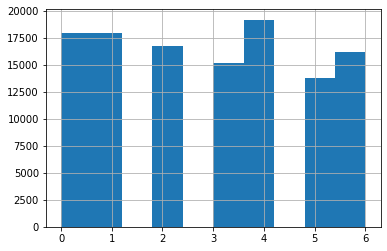

In [33]:
us_trending_df['publishedAtDay'] = us_trending_df['publishedAt'].dt.weekday
us_trending_df['publishedAtDay'].hist() 

<AxesSubplot:>

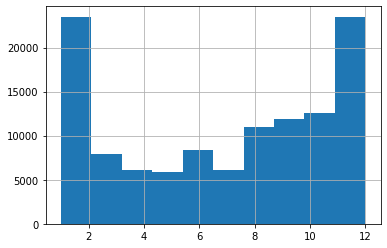

In [34]:
us_trending_df['publishedAtMonth'] = us_trending_df['publishedAt'].dt.month
us_trending_df['publishedAtMonth'].hist()

Notatka:
* Warto się przyjrzeć miesiącom publikacji

In [35]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
min_date = us_trending_df['publishedAt'].min()
max_date = us_trending_df['publishedAt'].max()

holidays = cal.holidays(start=min_date, end=max_date)
us_trending_df['publishedAtHoliday'] = us_trending_df['publishedAt'].apply(lambda date: date in holidays)
us_trending_df[us_trending_df['publishedAtHoliday']]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,title_capital_letters,title_punctuaction,description_height,description_length,description_link_count,tag_amount,publishedAtHour,publishedAtDay,publishedAtMonth,publishedAtHoliday


Filmiki z listy trending nie były publikowane z święta.

Notatka:
* można spróbować dzień przed/po świętach

Notatka końcowa:
* Warto sprawdzić rozkłady dla różnych kategorii filmików

# Usuwanie kolumn

In [36]:
us_trending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116791 entries, 0 to 116790
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                116791 non-null  object        
 1   title                   116791 non-null  object        
 2   publishedAt             116791 non-null  datetime64[ns]
 3   channelId               116791 non-null  object        
 4   channelTitle            116791 non-null  object        
 5   categoryId              116791 non-null  object        
 6   trending_date           116791 non-null  datetime64[ns]
 7   tags                    116791 non-null  object        
 8   view_count              116791 non-null  int64         
 9   likes                   116791 non-null  int64         
 10  dislikes                116791 non-null  int64         
 11  comment_count           116791 non-null  int64         
 12  thumbnail_link          116791

* Nie da się wykorzystać
  * Nieprzetworzonych tagów
  * Nieprzetworzonych opisów
  * Nieprzetworzonych tytułów
  * video_id
  * channelId - niekoniecznie
  * channelTitle - niekoniecznie
  * trending_date, bo niewystępuje w danych nie-trending
  * nieprzetworzone publishedAt

* Można zamienić na coś innego:
  * likes i dislikes można zamienić na ilość reakcji i procent likes

Notatka:
* channelId/Title można użyć do sprawdzania kategorii
* Trending date może mieć znaczenie na etapie uczenia (np. w jakim miesiącu są trending).

In [37]:
us_trending_clean_df = us_trending_df.copy()
us_trending_clean_df.drop(
    [
     "video_id",
     "title",
     "publishedAt",
     "channelId",
     "channelTitle",
     "categoryId",
     "trending_date",
     "tags",
     "description"
    ], axis=1, inplace=True
)
us_trending_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116791 entries, 0 to 116790
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   view_count              116791 non-null  int64 
 1   likes                   116791 non-null  int64 
 2   dislikes                116791 non-null  int64 
 3   comment_count           116791 non-null  int64 
 4   thumbnail_link          116791 non-null  object
 5   comments_disabled       116791 non-null  bool  
 6   ratings_disabled        116791 non-null  bool  
 7   category                116791 non-null  object
 8   title_length            116791 non-null  int64 
 9   title_capital_letters   116791 non-null  int64 
 10  title_punctuaction      116791 non-null  int64 
 11  description_height      116791 non-null  int64 
 12  description_length      116791 non-null  int64 
 13  description_link_count  116791 non-null  int64 
 14  tag_amount              116791 non-n

In [38]:
us_trending_clean_df

,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,category,title_length,title_capital_letters,title_punctuaction,description_height,description_length,description_link_count,tag_amount,publishedAtHour,publishedAtDay,publishedAtMonth,publishedAtHoliday
0,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,People & Blogs,34,25,3,7,361,3,15,19,1,8,False
1,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,Gaming,60,6,1,0,715,4,25,17,1,8,False
2,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,Entertainment,53,5,1,0,513,7,30,16,1,8,False
3,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Music,56,8,1,5,762,6,23,16,1,8,False
4,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Howto & Style,55,11,1,0,2493,35,33,15,1,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116786,317417,4967,0,1097,https://i.ytimg.com/vi/-nAwTgr9Ylk/default.jpg,False,False,Sports,99,13,2,0,1182,6,37,19,1,3,False
116787,2158717,56588,0,10487,https://i.ytimg.com/vi/q_YZX1SgZ5Y/default.jpg,False,False,Science & Technology,51,7,1,0,1938,24,25,15,0,3,False
116788,581932,9910,0,1661,https://i.ytimg.com/vi/K4XTSem2_Pc/default.jpg,False,False,Sports,86,19,4,0,1715,10,22,4,1,3,False
116789,8851737,875413,0,7474,https://i.ytimg.com/vi/p3KZXi9JDKE/default.jpg,False,False,Entertainment,19,0,0,0,1367,5,24,16,6,3,False


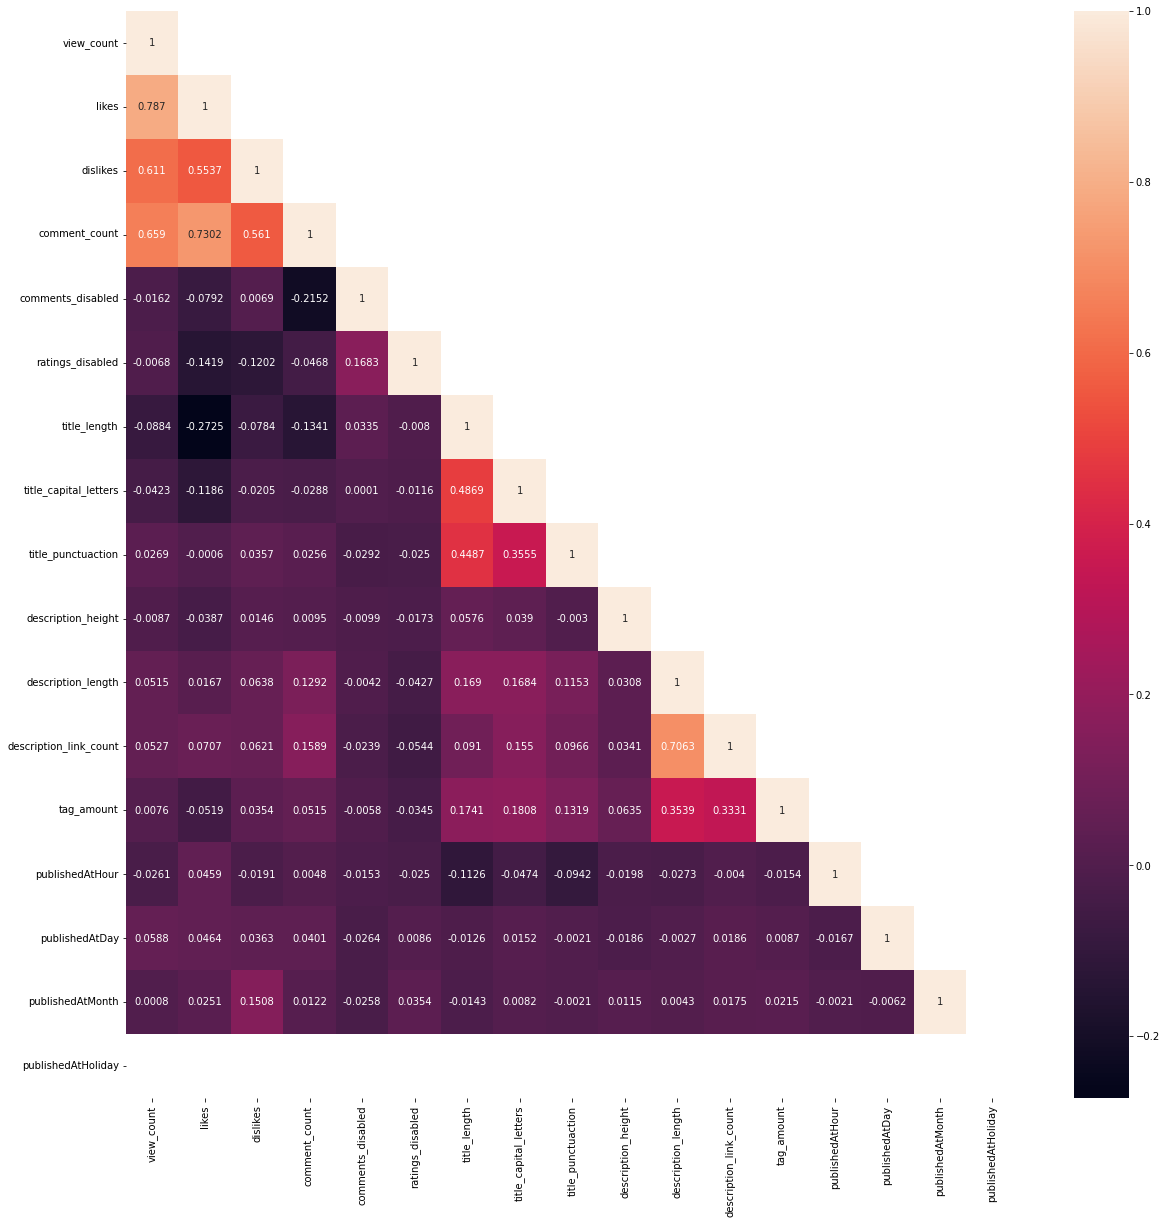

In [39]:
corrMatrix = us_trending_clean_df.corr(method='spearman')
corrMatrix = corrMatrix.round(4)

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
np.fill_diagonal(mask, False)

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrMatrix, mask=mask, annot=True, fmt='g', ax=ax)
plt.show()

Notatka:
* Można znormalizować liczbę dużych liter i znaków interpunkyjnych w tytule
* Powyższe zastosować można też dla opisów
